# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL

url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="



In [9]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity =city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | rawson
Processing Record 5 of Set 1 | bandar-e torkaman
City not found. Skipping...
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | port-cartier
Processing Record 8 of Set 1 | port angeles
Processing Record 9 of Set 1 | kandrian
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | hasaki
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | shingu
Processing Record 15 of Set 1 | lorengau
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 1 | hihifo
City not found. Skipping...
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | mwinilunga
Processing Record 21 of Set 1 | bowe

Processing Record 37 of Set 4 | kaitangata
Processing Record 38 of Set 4 | benguela
Processing Record 39 of Set 4 | puksoozero
Processing Record 40 of Set 4 | canton
Processing Record 41 of Set 4 | marsa matruh
Processing Record 42 of Set 4 | pevek
Processing Record 43 of Set 4 | necochea
Processing Record 44 of Set 4 | bethel
Processing Record 45 of Set 4 | grand gaube
Processing Record 46 of Set 4 | zemio
Processing Record 47 of Set 4 | mar del plata
Processing Record 48 of Set 4 | hithadhoo
Processing Record 49 of Set 4 | bengkulu
Processing Record 0 of Set 5 | luderitz
Processing Record 1 of Set 5 | flinders
Processing Record 2 of Set 5 | tuatapere
Processing Record 3 of Set 5 | galesong
Processing Record 4 of Set 5 | makakilo city
Processing Record 5 of Set 5 | codrington
Processing Record 6 of Set 5 | vaitape
Processing Record 7 of Set 5 | pacifica
Processing Record 8 of Set 5 | wajima
Processing Record 9 of Set 5 | havre-saint-pierre
Processing Record 10 of Set 5 | kerouane
Proc

Processing Record 28 of Set 8 | cordoba
Processing Record 29 of Set 8 | miri
Processing Record 30 of Set 8 | zabol
Processing Record 31 of Set 8 | dimbokro
Processing Record 32 of Set 8 | aasiaat
Processing Record 33 of Set 8 | pacific grove
Processing Record 34 of Set 8 | luwingu
Processing Record 35 of Set 8 | mildura
Processing Record 36 of Set 8 | atar
Processing Record 37 of Set 8 | berlevag
Processing Record 38 of Set 8 | bichura
Processing Record 39 of Set 8 | hvammstangi
City not found. Skipping...
Processing Record 40 of Set 8 | beloha
Processing Record 41 of Set 8 | bolshiye berezniki
City not found. Skipping...
Processing Record 42 of Set 8 | ust-nera
Processing Record 43 of Set 8 | touros
Processing Record 44 of Set 8 | comodoro rivadavia
Processing Record 45 of Set 8 | chateaubelair
Processing Record 46 of Set 8 | monte cristi
City not found. Skipping...
Processing Record 47 of Set 8 | plouzane
Processing Record 48 of Set 8 | labutta
City not found. Skipping...
Processing 

Processing Record 16 of Set 12 | borovskoy
Processing Record 17 of Set 12 | ylivieska
Processing Record 18 of Set 12 | buzuluk
Processing Record 19 of Set 12 | viligili
City not found. Skipping...
Processing Record 20 of Set 12 | ambulu
Processing Record 21 of Set 12 | andros town
Processing Record 22 of Set 12 | shenjiamen
Processing Record 23 of Set 12 | balakhninskiy
Processing Record 24 of Set 12 | port macquarie
Processing Record 25 of Set 12 | caracuaro
Processing Record 26 of Set 12 | atasu
Processing Record 27 of Set 12 | north platte
Processing Record 28 of Set 12 | olean
Processing Record 29 of Set 12 | manoel urbano
Processing Record 30 of Set 12 | havre
Processing Record 31 of Set 12 | taitung
Processing Record 32 of Set 12 | ilabaya
Processing Record 33 of Set 12 | nola
Processing Record 34 of Set 12 | bontang
Processing Record 35 of Set 12 | prince george
Processing Record 36 of Set 12 | kudahuvadhoo
Processing Record 37 of Set 12 | akyab
Processing Record 38 of Set 12 | 

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.2906,-156.7887,-16.58,76,0,17.27,US,1676140514
1,atuona,-9.8000,-139.0333,78.42,74,1,16.04,PF,1676140515
2,butaritari,3.0707,172.7902,79.61,81,100,10.78,KI,1676140515
3,rawson,-43.3002,-65.1023,82.71,24,26,13.49,AR,1676140516
4,punta arenas,-53.1500,-70.9167,55.51,47,75,14.97,CL,1676140483


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,barrow,71.2906,-156.7887,-16.58,76,0,17.27,US,1676140514
1,atuona,-9.8000,-139.0333,78.42,74,1,16.04,PF,1676140515
2,butaritari,3.0707,172.7902,79.61,81,100,10.78,KI,1676140515
3,rawson,-43.3002,-65.1023,82.71,24,26,13.49,AR,1676140516
4,punta arenas,-53.1500,-70.9167,55.51,47,75,14.97,CL,1676140483


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

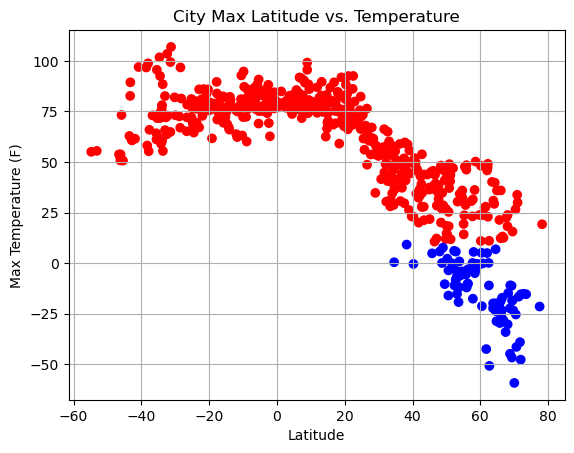

In [60]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis_temp = city_data_df['Max Temp'] 

c = ["blue" if y_axis_temp < 10 else "red" for y_axis_temp in y_axis_temp]

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis_temp, color= c)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Max Latitude vs. Temperature')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

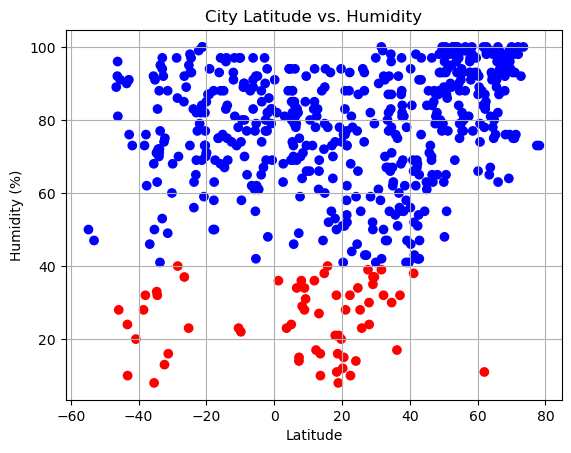

In [16]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis_hum = city_data_df['Humidity']
c = ["blue" if y_axis_hum > 40 else "red" for y_axis_hum in y_axis_hum]


# Incorporate the other graph properties
plt.scatter(x_axis, y_axis_hum, color= c)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

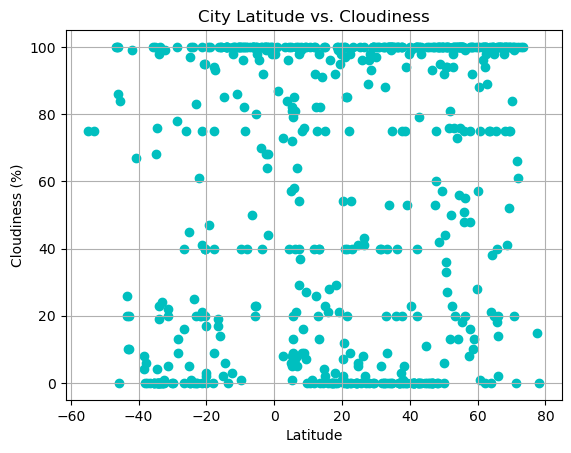

In [17]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis_clou = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis_clou, color= "c")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

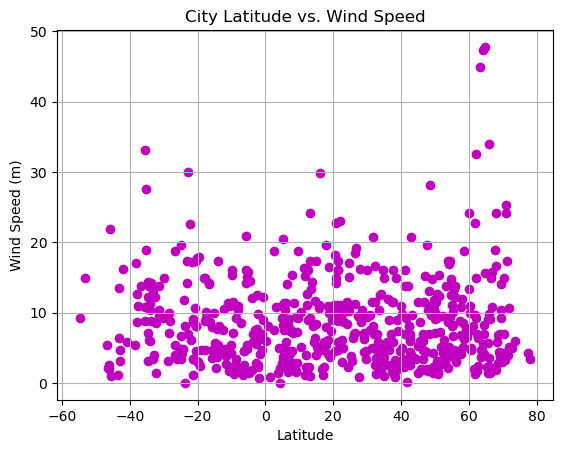

In [61]:
# Build the scatter plots for latitude vs. wind speed

x_axis = city_data_df['Lat']
y_axis_wind = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis_wind, color= "m")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m)')
plt.title('City Latitude vs. Wind Speed')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots

def line_regression(x_value, y_value):
    slope, intercept, r_value, p_value,  std_err = linregress(x_value, y_value)
    return slope, intercept, r_value, p_value, std_err

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,barrow,71.2906,-156.7887,-16.58,76,0,17.27,US,1676140514
2,butaritari,3.0707,172.7902,79.61,81,100,10.78,KI,1676140515
5,port-cartier,50.0334,-66.8654,14.76,63,6,7.09,CA,1676140516
6,port angeles,48.1181,-123.4307,46.51,65,0,10.36,US,1676140403
8,kapaa,22.0752,-159.3190,71.92,88,75,23.02,US,1676140517


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,atuona,-9.8000,-139.0333,78.42,74,1,16.04,PF,1676140515
3,rawson,-43.3002,-65.1023,82.71,24,26,13.49,AR,1676140516
4,punta arenas,-53.1500,-70.9167,55.51,47,75,14.97,CL,1676140483
7,kandrian,-6.2167,149.5500,77.02,89,100,4.59,PG,1676140517
9,ushuaia,-54.8000,-68.3000,55.06,50,75,9.22,AR,1676140272


###  Temperature vs. Latitude Linear Regression Plot

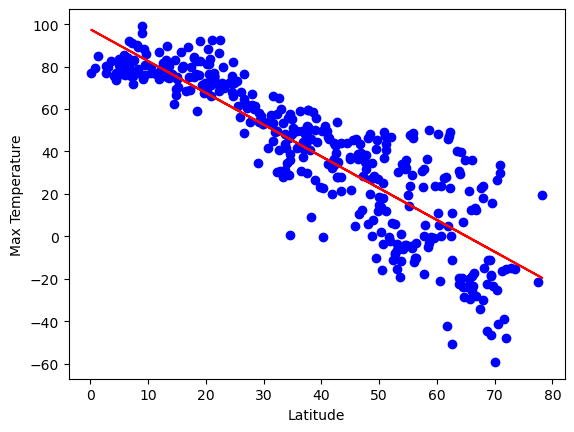

The r-value is: 0.7645909595750808.


In [39]:
# Linear regression on Northern Hemisphere

north_x = northern_hemi_df['Lat']
north_temp = northern_hemi_df['Max Temp']
north_slope, north_int, north_r, north_p, north_std_err = line_regression(north_x, north_temp)
north_temp_regress = north_slope*north_x + north_int
north_temp_slope_display = round(north_slope, 2)
north_temp_int_display = round(north_int, 2)
temp_eq_display = f"{north_temp_slope_display}x + {north_temp_int_display}"


plt.scatter(north_x, north_temp, color= "blue")
plt.plot(north_x, north_temp_regress, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')


plt.show()
print(f'The r-value is: {north_r**2}.')

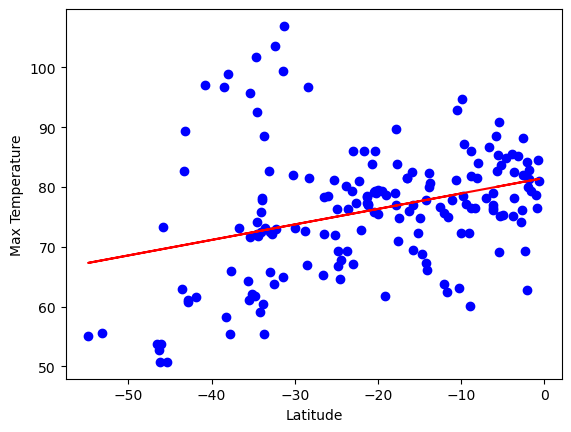

The r-value is: 0.10599046049032075.


In [37]:
# Linear regression on Southern Hemisphere

south_x = southern_hemi_df['Lat']
south_temp = southern_hemi_df['Max Temp']
south_slope, south_int, south_r, south_p, south_std_err = line_regression(south_x, south_temp)
south_temp_regress = south_slope*south_x + south_int
south_temp_slope_display = round(south_slope, 2)
south_temp_int_display = round(south_int, 2)
south_temp_eq_display = f"{south_temp_slope_display}x + {south_temp_int_display}"

plt.scatter(south_x, south_temp, color= "blue")
plt.plot(south_x, south_temp_regress, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')


plt.show()
print(f'The r-value is: {south_r**2}.')

**Discussion about the linear relationship:** Temperatures near to Equator are higher and temperatures near the Poles are lower.

### Humidity vs. Latitude Linear Regression Plot

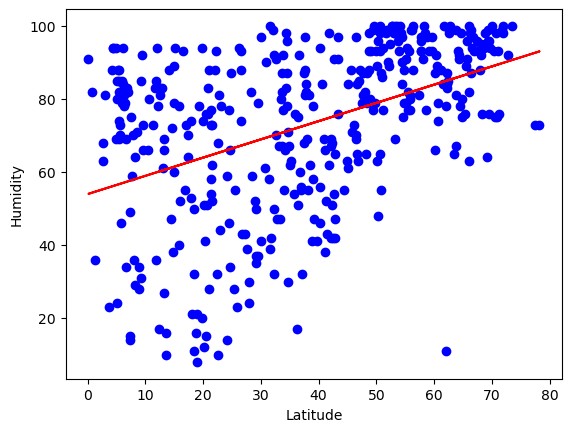

The r-value is: 0.19676672011792415.


In [43]:
# Northern Hemisphere

colour_humd = 'blue'
north_humd = northern_hemi_df['Humidity']
north_slope_humd, north_int_humd, north_r_humd, north_p_humd, north_std_err_humd = line_regression(north_x, north_humd)
north_humd_regress = north_slope_humd*north_x + north_int_humd
north_humd_slope_display = round(north_slope_humd, 2)
north_humd_int_display = round(north_int_humd, 2)
humd_eq_display = f"{north_humd_slope_display}x + {north_humd_int_display}"

plt.scatter(north_x, north_humd, c= "blue")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(north_x, north_humd_regress, color='red')

plt.show()
print(f'The r-value is: {north_r_humd**2}.')

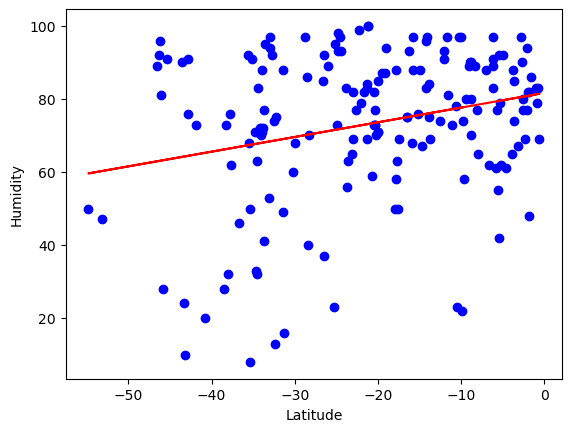

The r-value is: 0.06673495436421203.


In [46]:
# Southern Hemisphere

south_humd = southern_hemi_df['Humidity']
south_slope_humd, south_int_humd, south_r_humd, south_p_humd, south_std_err_humd = line_regression(south_x, south_humd)
south_slope_humd, south_int_humd, south_r_humd, south_p_humd, south_std_err_humd = line_regression(south_x, south_humd)
south_humd_regress = south_slope_humd*south_x + south_int_humd
south_humd_slope_display = round(south_slope_humd, 2)
south_humd_int_display = round(south_int_humd, 2)
south_humd_eq_display = f"{south_humd_slope_display}x + {south_humd_int_display}"

plt.scatter(south_x, south_humd, c= "blue")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(south_x, south_humd_regress, color='red')

plt.show()
print(f'The r-value is: {south_r_humd**2}.')

**Discussion about the linear relationship:** At this time of the year the humidity are higher in the North hemisphere and pretty disperse at lower Latitude.

### Cloudiness vs. Latitude Linear Regression Plot

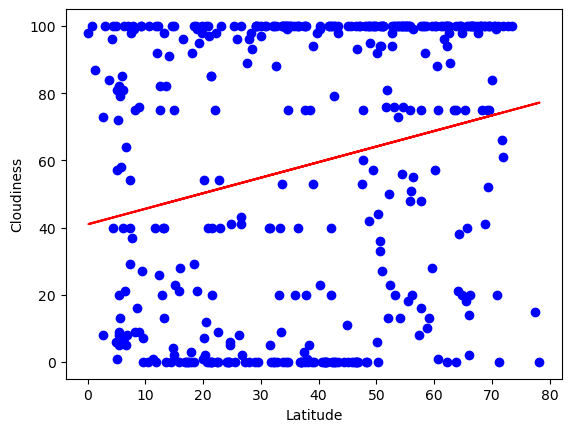

The r-value is: 0.06673495436421203.


In [49]:
# Northern Hemisphere

colour_cloud = 'blue'
north_cloud = northern_hemi_df['Cloudiness']
north_slope_cloud, north_int_cloud, north_r_cloud, north_p_cloud, north_std_err_cloud = line_regression(north_x, north_cloud)
north_cloud_regress = north_slope_cloud*north_x + north_int_cloud
north_cloud_slope_display = round(north_slope_cloud, 2)
north_cloud_int_display = round(north_int_cloud, 2)
cloud_eq_display = f"{north_cloud_slope_display}x + {north_cloud_int_display}"

plt.scatter(north_x, north_cloud, c=colour_cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(north_x, north_cloud_regress, color='red')

plt.show()
print(f'The r-value is: {south_r_humd**2}.')

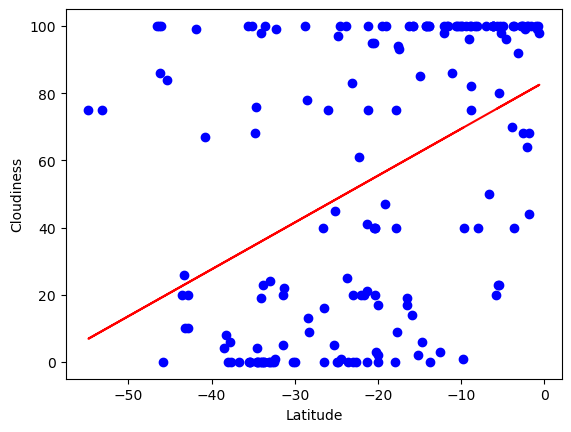

The r-value is: 0.18984384298958928.


In [55]:
# Southern Hemisphere

south_cloud = southern_hemi_df['Cloudiness']
south_slope_cloud, south_int_cloud, south_r_cloud, south_p_cloud, south_std_err_cloud = line_regression(south_x, south_cloud)
south_cloud_regress = south_slope_cloud*south_x + south_int_cloud
south_cloud_slope_display = round(south_slope_cloud, 2)
south_cloud_int_display = round(south_int_cloud, 2)
south_cloud_eq_display = f"{south_cloud_slope_display}x + {south_cloud_int_display}"

plt.scatter(south_x, south_cloud, c= 'blue')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(south_x, south_cloud_regress, color='red')

plt.show()
print(f'The r-value is: {south_r_cloud**2}.')

**Discussion about the linear relationship:** At this time of the year the cloudiness are higher in the North hemisphere and pretty disperse at lower Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

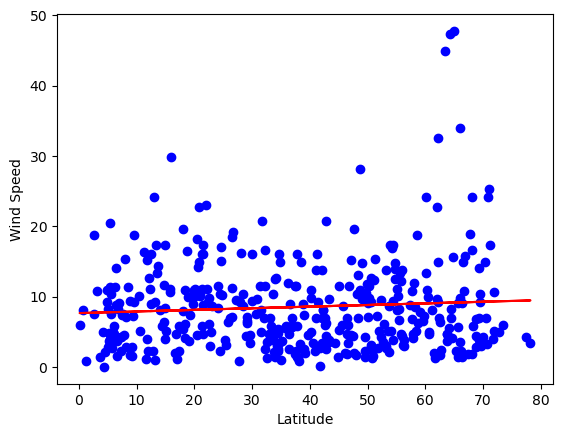

The r-value is: 0.005128795050114944.


In [56]:
# Northern Hemisphere

colour_wind = 'blue'
north_wind = northern_hemi_df['Wind Speed']
north_slope_wind, north_int_wind, north_r_wind, north_p_wind, north_std_err_wind = line_regression(north_x, north_wind)
north_wind_regress = north_slope_wind*north_x + north_int_wind
north_wind_slope_display = round(north_slope_wind, 2)
north_wind_int_display = round(north_int_wind, 2)
wind_eq_display = f"{north_wind_slope_display}x + {north_wind_int_display}"

plt.scatter(north_x, north_wind, c=colour_wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(north_x, north_wind_regress, color='red')
plt.show()

print(f'The r-value is: {north_r_wind**2}.')

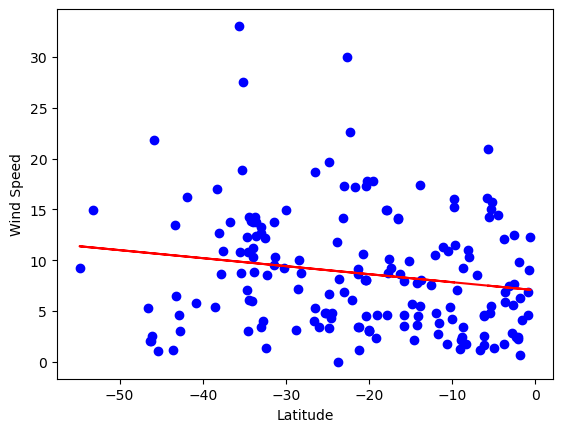

The r-value is: 0.005128795050114944.


In [59]:
# Southern Hemisphere

south_wind = southern_hemi_df['Wind Speed']
south_slope_wind, south_int_wind, south_r_wind, south_p_wind, south_std_err_wind = line_regression(south_x, south_wind)
south_wind_regress = south_slope_wind*south_x + south_int_wind
south_wind_slope_display = round(south_slope_wind, 2)
south_wind_int_display = round(south_int_wind, 2)
south_wind_eq_display = f"{south_wind_slope_display}x + {south_wind_int_display}"

plt.scatter(south_x, south_wind, c=colour_wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(south_x, south_wind_regress, color='red')
plt.show()

print(f'The r-value is: {north_r_wind**2}.')

**Discussion about the linear relationship:** In all Latitudes the wind speed the average is near to 10 mph. 